In [1]:
import numpy as np
from matplotlib import pyplot as plt
from kafe2 import  XYContainer, Fit, XYFit, Plot, ContoursProfiler                            
import PhyPraKit as ppk
from scipy.signal import find_peaks
from uncertainties import ufloat, unumpy
from math import log10, floor
import scipy.integrate as integrate
import pandas as pd

Welcome to JupyROOT 6.24/06


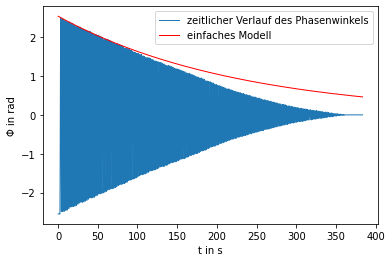

In [2]:
data=pd.read_csv('Aufgabe 1 Winkelzeit.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t','w_t']
t = data['t'].to_numpy()
w_t = data['w_t'].to_numpy()
a=2.55
b=227.4
c=-0.01
ab=a*np.exp(-t/b)+c
plt.plot(t, w_t, lw=1, label='zeitlicher Verlauf des Phasenwinkels')
plt.plot(t, ab, c='r', lw=1, label='einfaches Modell')
plt.xlabel('t in s')
plt.ylabel('Φ in rad')
plt.legend()

plt.savefig('Augabe 1 zeitlicher Verlauf des Phasenwinkels.png')
plt.show()


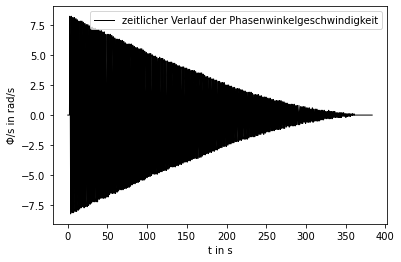

In [3]:
data=pd.read_csv('Aufgabe 1 Winkelgeschw Zeit.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t','v_t']
t = data['t'].to_numpy()
v_t = data['v_t'].to_numpy()
plt.plot(t, v_t, c='black', lw=1, label='zeitlicher Verlauf der Phasenwinkelgeschwindigkeit')
plt.xlabel('t in s')
plt.ylabel('Φ/s in rad/s')
plt.legend()

plt.savefig('Aufgabe 1 zeitlicher Verlauf der Phasenwinkelgeschwindigkeit.png')
plt.show()

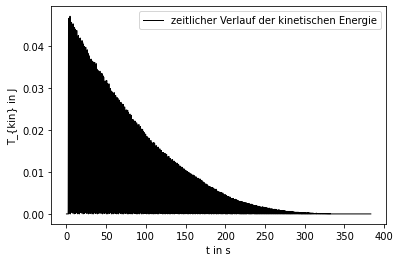

In [4]:
data=pd.read_csv('Aufgabe 1 Energie.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t','T_kin']
t = data['t'].to_numpy()
T_kin = data['T_kin'].to_numpy()
plt.plot(t, T_kin, c='black', lw=1, label='zeitlicher Verlauf der kinetischen Energie')
plt.xlabel('t in s')
plt.ylabel('T_{kin} in J')
plt.legend()

plt.savefig('Aufgabe 1 zeitlicher Verlauf der kinetischen Energie.png')
plt.show()

Mittelwert Periodendauer: 1.8833333333333333
Standardabweichung der Periodendauer: 0.037267799624997364
Unsicherheit nach Gausscher Fehlerfortpflanzung: 0.0014640174352631727


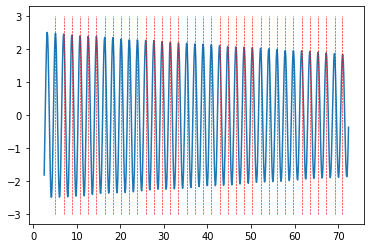

In [18]:
#Periodendauer
data=pd.read_csv('Aufgabe 1 Winkelzeit.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t','w_t']
t = data['t'].to_numpy()
w_t = data['w_t'].to_numpy()
t = t[24:]
t = t[:700]
w_t = w_t[24:]
w_t = w_t[:700]
plt.plot(t,w_t)
peaks=ppk.convolutionPeakfinder(w_t)
t_mess=np.zeros(len(peaks)-1)
i=0
currenttime=0
for peak in peaks:
    if(i>0&i<len(peaks)-1):
        plt.vlines(t[peak], -3, 3, color='red', ls='--',linewidth=0.6)
        t_mess[i-1]=t[peak].copy()-currenttime
    i=i+1
    currenttime=t[peak].copy()


print('Mittelwert Periodendauer:',np.mean(t_mess))     #Mittelwert Periodendauer
print('Standardabweichung der Periodendauer:',np.sqrt(np.var(t_mess)))
print('Unsicherheit nach Gausscher Fehlerfortpflanzung:', np.sqrt(2)*(1/(len(peaks)-1))*np.sqrt(np.var(t_mess)))


Während der Berechnung des Mittelwerts kürzen sich dadurch, 
das über die Zeitdifferenz der benachbarten Peaks gemittelt wird, 
alle Zeiten der Peaks außer dem ersten und dem letzten Peak heraus. Somit ergibt sich aus der Gausschen Fehlerfortpflanzung ein Vorfaktor $\frac{\sqrt{2}}{n}$ für den Fehler. 
Der Fehler ergibt sich somit zu:\
$$\begin{equation}
\begin{split}
\Delta{T} &= \frac{\sqrt{2}}{n}*\sigma \\
&= 0.03726 \text{s}
\end{split}
\end{equation}$$


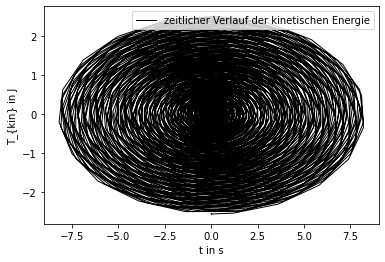

In [6]:
data=pd.read_csv('Aufgabe 1 Phasenraum.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t','Phas']
t = data['t'].to_numpy()
phas = data['Phas'].to_numpy()
plt.plot(t, phas, c='black', lw=1, label='zeitlicher Verlauf der kinetischen Energie')
plt.xlabel('t in s')
plt.ylabel('T_{kin} in J')
plt.legend()

plt.savefig('Aufgabe 1 zeitlicher Verlauf der kinetischen Energie.png')
plt.show()

In [7]:
# Aufgabe 2